In [188]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [189]:
df = pd.read_csv(r'/content/netflix_titles.csv')

In [190]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [191]:
df.shape

(8807, 12)

In [192]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [193]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [194]:
display(df.isnull().sum())

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [195]:
df.dropna(inplace = True)

In [196]:
display(df.duplicated().sum())

np.int64(0)

In [197]:
df.describe()

,release_year
count,5332.000000
mean,2012.742123
std,9.625831
min,1942.000000
25%,2011.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


In [198]:
df.nunique()

,0
show_id,5332
type,2
title,5332
director,3945
cast,5200
country,604
date_added,1453
release_year,72
rating,14
duration,198


In [199]:
most_frequent_country = df['country'].value_counts().index[0]
print(f"The most frequent country is: {most_frequent_country}")

The most frequent country is: United States


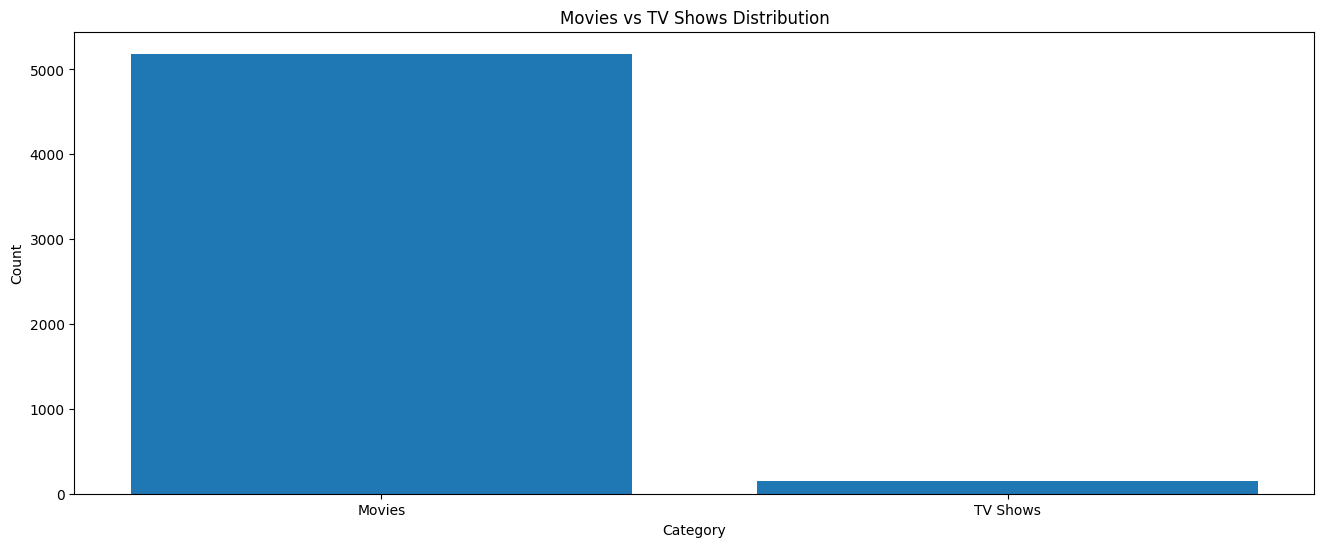

In [200]:
movie_count = df['type'].value_counts()['Movie']
tvshows_count = df['type'].value_counts()['TV Show']
plt.figure(figsize=(16, 6))
plt.bar(['Movies', 'TV Shows'], [movie_count, tvshows_count])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Movies vs TV Shows Distribution')
plt.show()

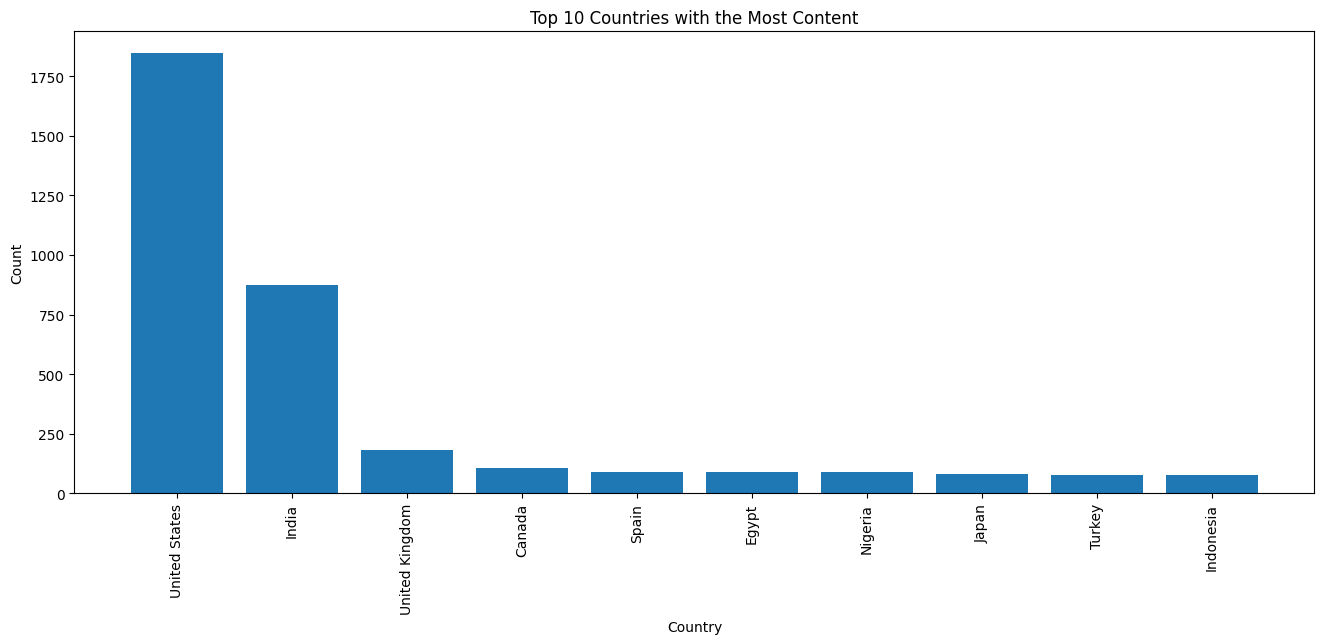

In [201]:
country = df['country'].value_counts()

plt.figure(figsize=(16, 6))
plt.bar(country.index[:10], country.values[:10])
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries with the Most Content')
plt.xticks(rotation=90)
plt.show()

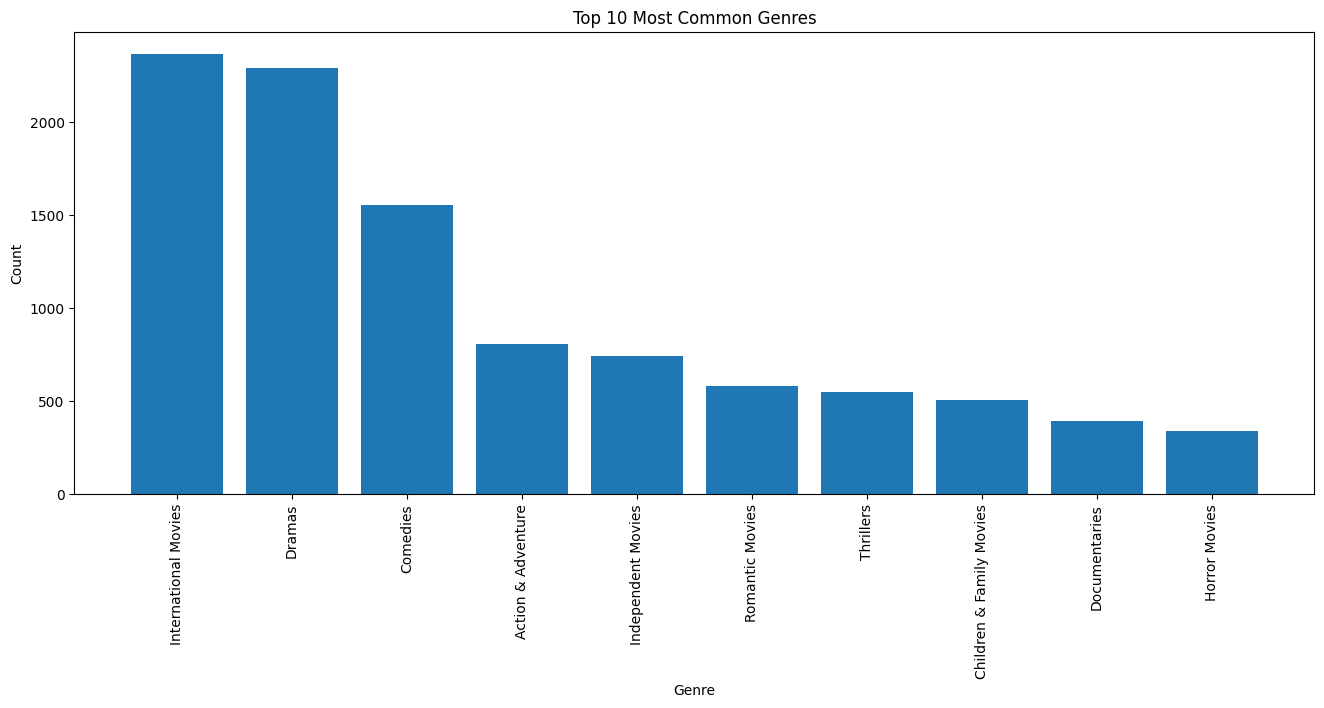

In [202]:
genre_counts = df['listed_in'].str.split(',').explode().str.strip().value_counts()

plt.figure(figsize=(16, 6))
plt.bar(genre_counts.index[:10], genre_counts.values[:10])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Most Common Genres')
plt.xticks(rotation=90)
plt.show()

In [203]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


Netflix Content Growth by Release Year:


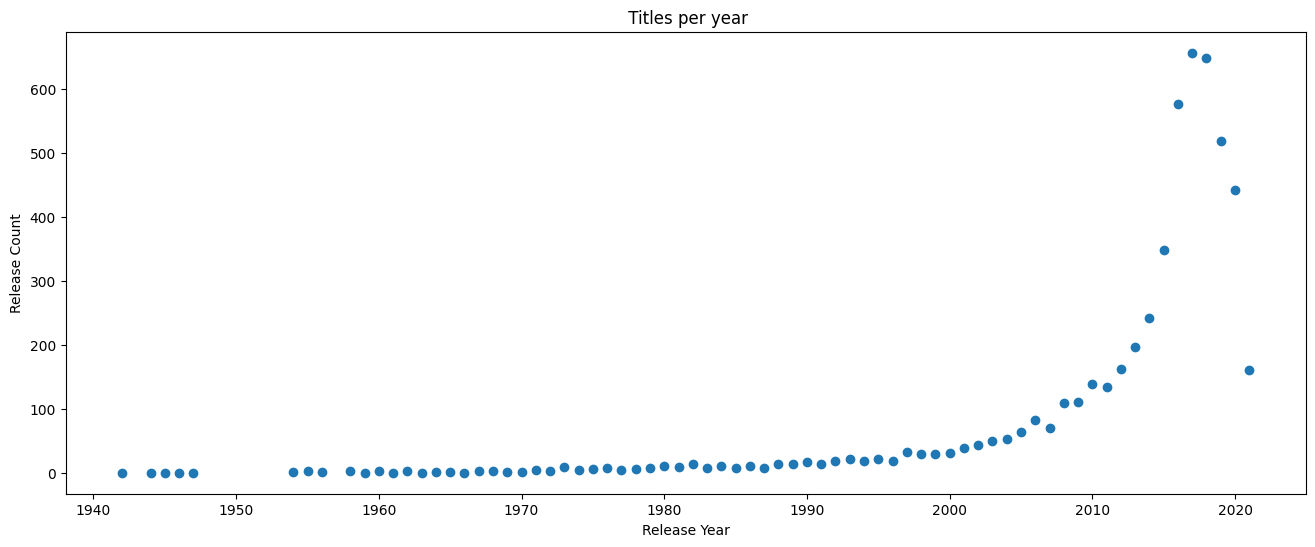

In [204]:
plt.figure(figsize=(16, 6))
content_growth = df.groupby('release_year').size().reset_index(name='count')
print("Netflix Content Growth by Release Year:")
plt.scatter(content_growth['release_year'],content_growth['count'])
plt.xlabel('Release Year')
plt.ylabel('Release Count')
plt.title(' Titles per year')
plt.show()

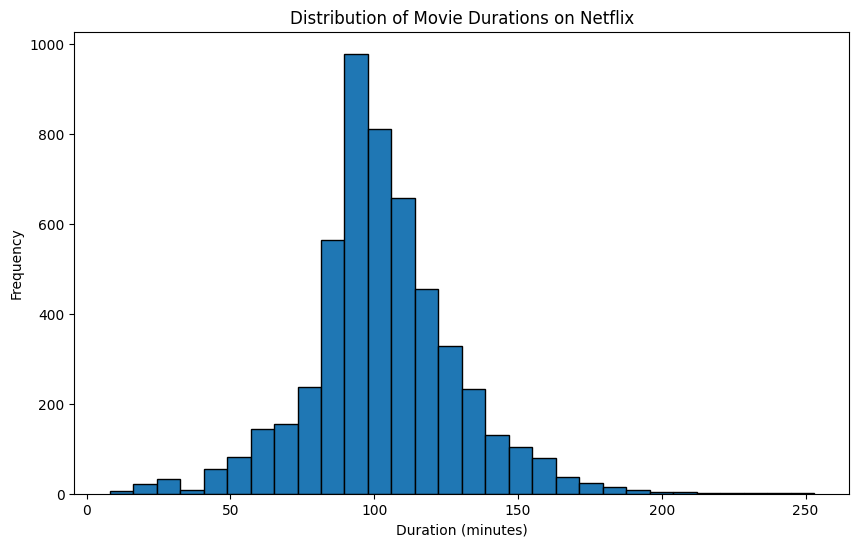

In [205]:
movies_df = df[df['type'] == 'Movie'].copy()
df['duration_minutes'] = movies_df['duration'].str.replace(' min', '').astype(float)

plt.figure(figsize=(10, 6))
plt.hist(df['duration_minutes'], bins=30, edgecolor='black')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Durations on Netflix')
plt.show()

In [206]:
df['duration_minutes'].skew()

np.float64(0.28147040573415033)

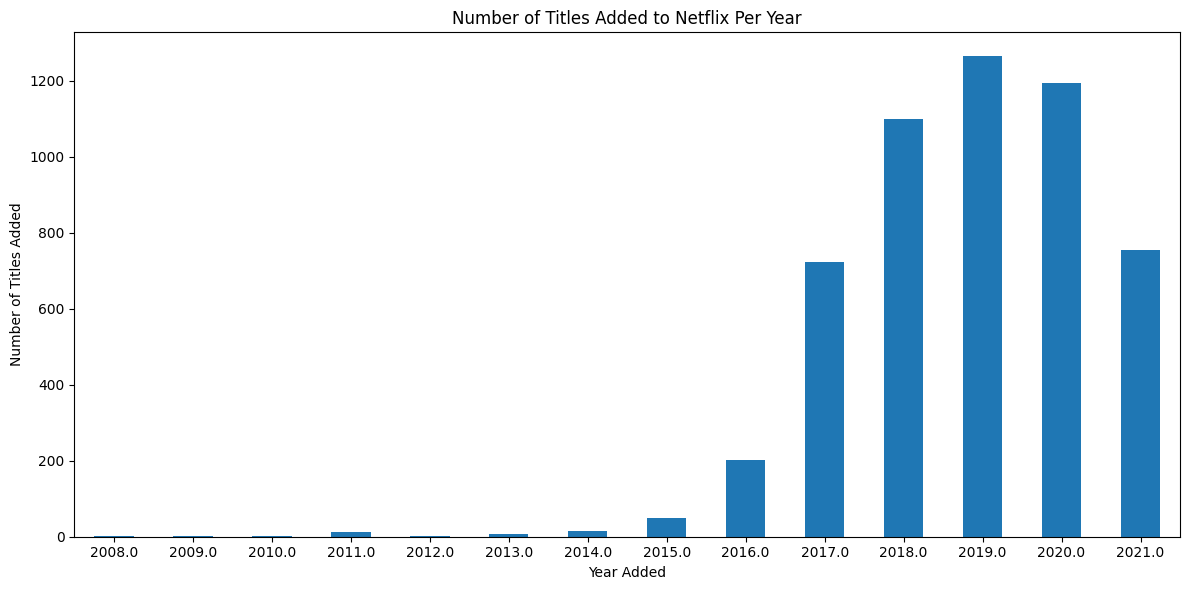

In [207]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
titles_per_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
titles_per_year.plot(kind='bar')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.title('Number of Titles Added to Netflix Per Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [208]:
year_highest_releases = titles_per_year.idxmax()
count_highest_releases = titles_per_year.max()

print(f"The year with the highest number of releases is: {year_highest_releases} with {count_highest_releases} titles.")

The year with the highest number of releases is: 2019.0 with 1264 titles.


In [209]:
most_recent_year = df['year_added'].max()
start_year_last_5 = most_recent_year - 4
titles_last_5_years = df[df['year_added'] >= start_year_last_5]
percentage_last_5_years = (len(titles_last_5_years) / len(df)) * 100
print(f"Percentage of titles added in the last 5 years ({start_year_last_5}-{most_recent_year}): {percentage_last_5_years:.2f}%")

Percentage of titles added in the last 5 years (2017.0-2021.0): 94.43%


In [210]:
movies_df = df[df['type'] == 'Movie']
tvshows_df = df[df['type'] == 'TV Show']
most_common_movie_rating = movies_df['rating'].value_counts().idxmax()
most_common_tvshow_rating = tvshows_df['rating'].value_counts().idxmax()

print(f"The most common rating for Movies is: {most_common_movie_rating}")
print(f"The most common rating for TV Shows is: {most_common_tvshow_rating}")

The most common rating for Movies is: TV-MA
The most common rating for TV Shows is: TV-MA


In [211]:
df['release_year_quartile'] = pd.qcut(df['release_year'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
display(df[['title', 'release_year', 'release_year_quartile']].head())

quartile_ranges = df.groupby('release_year_quartile')['release_year'].agg(['min', 'max'])
print("Range of release years for each quartile:")
quartile_ranges

,title,release_year,release_year_quartile
7,Sankofa,1993,Q1
8,The Great British Baking Show,2021,Q4
9,The Starling,2021,Q4
12,Je Suis Karl,2021,Q4
24,Jeans,1998,Q1


Range of release years for each quartile:


/tmp/ipython-input-102438254.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_ranges = df.groupby('release_year_quartile')['release_year'].agg(['min', 'max'])


,min,max
release_year_quartile,,
Q1,1942,2011
Q2,2012,2016
Q3,2017,2018
Q4,2019,2021


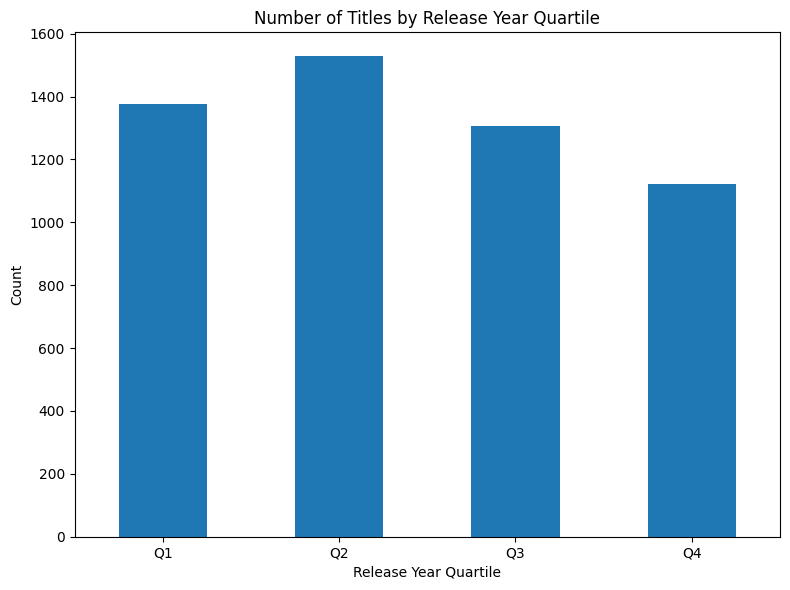

In [212]:
quartile_counts = df['release_year_quartile'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
quartile_counts.plot(kind='bar')
plt.xlabel('Release Year Quartile')
plt.ylabel('Count')
plt.title('Number of Titles by Release Year Quartile')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [213]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,year_added,release_year_quartile
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125.0,2021.0,Q1
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,NaN,2021.0,Q4
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104.0,2021.0,Q4
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127.0,2021.0,Q4
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166.0,2021.0,Q1


In [214]:
movies_df = df[df['type'] == 'Movie'].copy()
sorted_movies = movies_df.sort_values(by=['release_year', 'title'], ascending=[False, True])
display(sorted_movies.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,year_added,release_year_quartile
1150,s1151,Movie,7 Yards: The Chris Norton Story,Jonathon Link,Chris Norton,United States,2021-03-30,2021,TV-PG,93 min,Documentaries,The true story of former college football play...,93.0,2021.0,Q4
850,s851,Movie,99 Songs,Vishwesh Krishnamoorthy,"Ehan Bhat, Edilsy Vargas, Manisha Koirala, Lis...",India,2021-05-21,2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...,131.0,2021.0,Q4
463,s464,Movie,A Classic Horror Story,"Roberto De Feo, Paolo Strippoli","Matilda Lutz, Francesco Russo, Peppino Mazzott...",Italy,2021-07-14,2021,TV-MA,95 min,"Horror Movies, International Movies","In this gruesome suspense film, strangers trav...",95.0,2021.0,Q4
452,s453,Movie,A Perfect Fit,Hadrah Daeng Ratu,"Nadya Arina, Refal Hady, Giorgino Abraham, Ang...",Indonesia,2021-07-15,2021,TV-PG,113 min,"Comedies, Dramas, International Movies",Sparks fly when a fashion blogger in Bali meet...,113.0,2021.0,Q4
393,s394,Movie,A Second Chance: Rivals!,Clay Glen,"Emily Morris, Stella Shute, Eva Grados, India ...",Australia,2021-07-23,2021,PG,91 min,"Children & Family Movies, Sports Movies",Crushed when she doesn't qualify for the Olymp...,91.0,2021.0,Q4


In [215]:
top_5_countries = df['country'].value_counts().head(5)
display(top_5_countries)

,count
country,
United States,1846
India,875
United Kingdom,183
Canada,107
Spain,91


In [216]:
titles_2000_2010 = df[(df['release_year'] >= 2000) & (df['release_year'] <= 2010)]
titles_2000_2010['title']

,title
27,Grown Ups
48,Training Day
51,InuYasha the Movie 2: The Castle Beyond the Lo...
52,InuYasha the Movie 3: Swords of an Honorable R...
53,InuYasha the Movie 4: Fire on the Mystic Island
...,...
8793,"Yours, Mine and Ours"
8799,Zenda
8802,Zodiac
8804,Zombieland


In [217]:
drama_titles_count = df['listed_in'].str.contains('Drama', na=False).sum()
print(f"Number of titles with 'Drama' in listed_in: {drama_titles_count}")

Number of titles with 'Drama' in listed_in: 2345
